In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
dataset=sns.get_dataset_names()
np.array(dataset)

array(['anagrams', 'anscombe', 'attention', 'brain_networks',
       'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise',
       'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg',
       'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic'],
      dtype='<U14')

In [18]:
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
X=iris.drop("species",axis=1)
X
y=iris["species"]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45,stratify=y)

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)
y_train_pred=dtree.predict(X_train)
y_test_pred=dtree.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
print("Train Accuracy: ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy is: ",accuracy_score(y_test,y_test_pred))

Train Accuracy:  1.0
Test Accuracy is:  0.8666666666666667


In [47]:
#Getting best accuracy and parameters from Randomized Search CV and Grid Search CV
#Grid Search CV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params={"max_depth":[2,4,6,8,10,12],
       "min_samples_split":[2,3,4],
       "min_samples_leaf":[1,2,3]}
dtree=DecisionTreeClassifier()
grid=GridSearchCV(dtree,param_grid=params)
grid.fit(X_train,y_train)
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=3)

In [51]:
model=grid.best_estimator_
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print("Train Accuracy is:",accuracy_score(y_train,y_train_pred))
print("Test Accuracy is:",accuracy_score(y_test,y_test_pred))

Train Accuracy is: 0.9833333333333333
Test Accuracy is: 0.9333333333333333


# Post Pruning

Post-Pruning is known as backward pruning. It is the process where the decision tree is generated first and then the non-significant branches are removed. We use this technique after the construction of the decision tree. It is used when decision tree has very large or infinite depth and shows overfitting of the model. In Pre-prunning, we use parameters like "max_depth" and "max_samples_split". But here we prune the branches of decision tree using **cost_complexity_pruning** technique. **ccp_alpha**, the cost complexity prarmeter, parameterize technique

ccp_alpha gives minimum leaf value of decision tree and each ccp_alpha will create different-different classifier and choose the best out of it. More number of nodes are pruned with greater value of ccp_alpha

In Decision Trees, cost complexity pruning with **ccp_alpha** is a method to control the size of the tree and avoid overfitting by adding a penalty term to the cost function being optimized. The **ccp_alpha** parameter determines the strength of the penalty term, with a higher **ccp_alpha** value resulting in more pruning and a smaller, simpler tree.

When training a Decision Tree with cost complexity pruning, the algorithm will choose the tree size that minimizes the sum of the cost function and the penalty term. The cost function measures the accuracy of the tree, while the penalty term discourages the tree from growing too large. The **ccp_alpha** parameter sets the trade-off between these two factors, allowing the user to control the complexity of the resulting tree.

In [86]:
path=dtree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print(ccp_alphas)

[0.         0.00811404 0.0125     0.03392857 0.27067669 0.33333333]


In [75]:
clfs=[]
for i in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    clf.fit(X_train,y_train)
    clfs.append(clf)

In [88]:
ccp_alphas

array([0.        , 0.00811404, 0.0125    , 0.03392857, 0.27067669,
       0.33333333])

In [67]:
clfs
DecisionTreeClassifier()

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00811403508771929, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0125, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03392857142857145, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.2706766917293233, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.3333333333333334, random_state=0)]

After appending the list for each alpha to our model, we will plot Accuracy vs alpha graph. This is to know the value of alpha for which we will get maximum training accuracy.

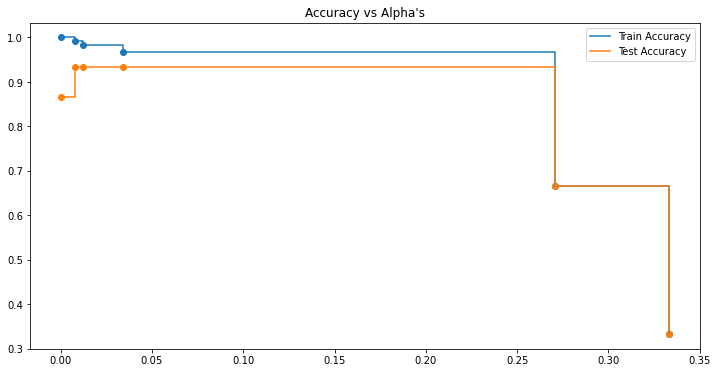

In [89]:
train_acc=[]
test_acc=[]
for i in clfs:
    y_train_pred=i.predict(X_train)
    y_test_pred=i.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))
plt.figure(figsize=(12,6))
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label="Train Accuracy",drawstyle='steps-post')
plt.plot(ccp_alphas,test_acc,label="Test Accuracy",drawstyle="steps-post")
plt.legend()
plt.title("Accuracy vs Alpha's")
plt.show()

We can choose **ccp_alpha=0.05** as we get the maximum **Test Accuracy=0.93** along with optimum train accuracy with it. Although our **Train Accuracy** has decreased to **0.96**. Now, our model is now more generalized and it will perform better on unseen data.